# Stock Market Trend Analyzer V. 1.0
Code in Place Spring 2020 Final Project - Maria Clarissa Fionalita


## Disclaimer

DO NOT BASE ANY INVESTMENT DECISION UPON ANY INFORMATION ON THIS PROGRAM/ MODEL.  PLEASE BE ADVISED THAT YOUR CONTINUED USE OF THIS PROGRAM/ MODEL OR THE INFORMATION PROVIDED HEREIN SHALL INDICATE YOUR CONSENT AND AGREEMENT TO THESE TERMS. 

This program/ model is a final project for Code in Place Spring 2020 by Maria Clarissa Fionalita, a Python programming class.  We are not registered as a securities broker-dealer or an investment advisor. We are neither licensed nor qualified to provide investment advice.

The information contained on this program/ model is neither an offer nor a recommendation to buy or sell securities.  Any information found on this program/ model is not provided to any particular individual with a view toward their individual circumstances. This program/ model has been prepared for informational purposes only and is not intended to be used as a complete source of information on any particular company. An individual should never invest in the securities of any of the companies’ listed based solely on information contained on this program/ model. Individuals should assume that all information contained on this program/ model is not trustworthy unless verified by their own independent research.

Any individual who chooses to invest in any securities should do so with caution. Investing in securities is speculative and carries a high degree of risk; you may lose some or all of the money that is invested. Always research your own investments and consult with a registered investment adviser or licensed stock broker before investing.  We will not be responsible for the success or failure of any individual or entity which implements information received from this site.

We do not provide any assurance as to the accuracy or completeness of the information provided. We have no first-hand knowledge of any listed company’s operations and therefore cannot comment on their capabilities, intent, resources, nor experience and we make no attempt to do so.  To the fullest extent of the law, we will not be liable to any person or entity for the quality, accuracy, completeness, reliability, or timeliness of the information provided on this website, or for any direct, indirect, consequential, incidental, special or punitive damages that may arise out of the use of information we provide to any person or entity (including, but not limited to, lost profits, loss opportunities, trading losses, and damages that may result from any inaccuracy or incompleteness of this information).

WE DO NOT IMPLY, PREDICT, OR GUARANTEE THAT YOU WILL BE SUCCESSFUL IN EARNING ANY MONEY WHATSOEVER.  IF YOU RELY UPON ANY FIGURES OR INFORMATION ON THIS WEBSITE, YOU MUST ACCEPT THE RISK OF SUBSTANTIAL LOSSES.

We encourage you to invest carefully.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Stock Market Data

In [3]:
df = pd.DataFrame({'Stock Code': ['GSPC']})
print(str(df))
code = ""
user = int(input("Enter stock number: "))
while user > 0:
    user = int(input("Code does not exist. Please enter the correct stock number: "))
    while user == "":
        user = int(input("Enter stock number: "))
if user == 0:
    code = "GSPC"
print(str("Code selected:"), str(code))

  Stock Code
0       GSPC
Enter stock number: 0
Code selected: GSPC


In [5]:
if code == "GSPC": # S&P 50
    GSPC = pd.read_csv("data/indices/^GSPC.csv", index_col=0)

In [59]:
GSPC["Price1"] = GSPC["Close"].shift(-1)
GSPC["PriceDiff"] = GSPC["Price1"] - GSPC["Close"]
GSPC["Return"] = GSPC["PriceDiff"] / GSPC["Close"]
GSPC["MA10"] = GSPC["Close"].rolling(10).mean()
GSPC["MA50"] = GSPC["Close"].rolling(50).mean()
GSPC["MA100"] = GSPC["Close"].rolling(100).mean()

In [60]:
GSPC.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,MA40,...,MA400,Shares,Close1,Profit,Wealth,% gain,% Gain,MA10,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,2020.579956,-37.619995,-0.018278,NaN,...,NaN,0,2020.579956,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,2002.609985,-17.969971,-0.008893,NaN,...,NaN,0,2002.609985,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,2025.900024,23.290039,0.011630,NaN,...,NaN,0,2025.900024,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,2062.139893,36.239869,0.017888,NaN,...,NaN,0,2062.139893,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,2044.810059,-17.329834,-0.008404,NaN,...,NaN,0,2044.810059,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [61]:
GSPC.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22'],
      dtype='object', name='Date', length=1357)

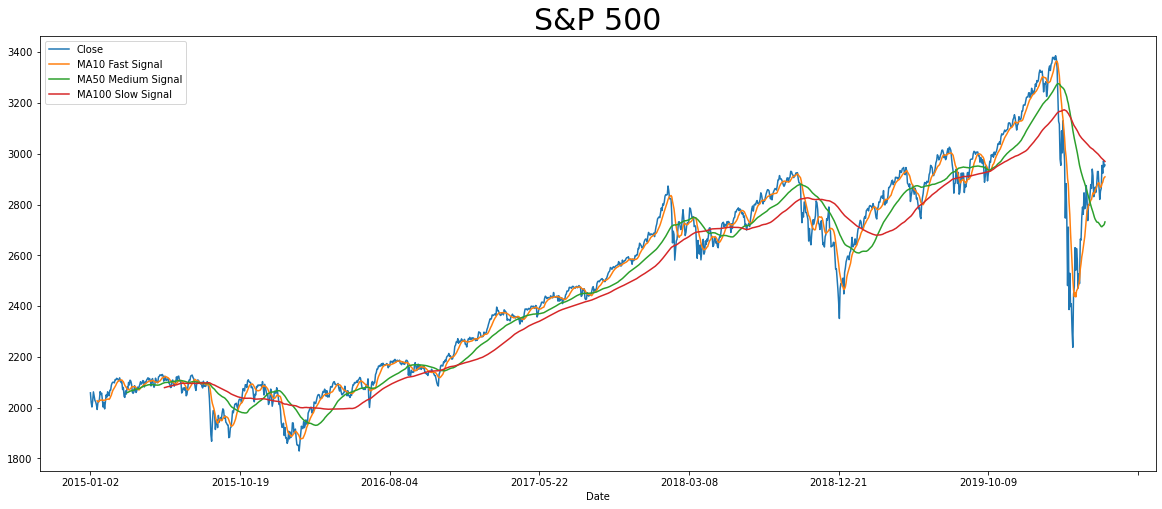

In [64]:
plt.figure(figsize=(20, 8))
plt.title("S&P 500", size = 30)
GSPC["Close"].plot(label='Close')
GSPC["MA10"].plot(label='MA10 Fast Signal') #fast signal
GSPC["MA50"].plot(label='MA50 Medium Signal') #medium signal
GSPC["MA100"].plot(label='MA100 Slow Signal') #slow signal
plt.legend()
plt.show()

In [74]:
GSPC["Shares"] = [ 1 if GSPC.loc[i, "MA10"] > GSPC.loc[i, "MA50"] else 0 for i in GSPC.index]

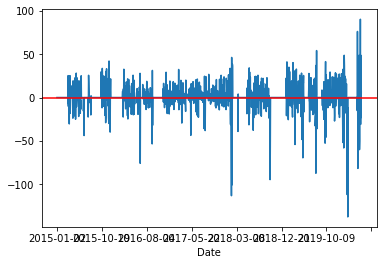

In [75]:
#Daily Profit
GSPC["Close1"] = GSPC["Close"].shift(-1)
GSPC["Profit"] = [GSPC.loc[i, "Close1"] - GSPC.loc[i, "Close"]
                if GSPC.loc[i, "Shares"] == 1
                else 0 for i in GSPC.index]
GSPC["Profit"].plot()
plt.axhline(y = 0, color="red")

In [77]:
GSPC["Wealth"] = GSPC["Profit"].cumsum()
GSPC["% Gain"] = (GSPC["Wealth"] / GSPC.loc[GSPC.index[0], "Close"])*100
GSPC

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,MA40,...,MA400,Shares,Close1,Profit,Wealth,% gain,% Gain,MA10,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,2020.579956,-37.619995,-0.018278,NaN,...,NaN,0,2020.579956,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,2002.609985,-17.969971,-0.008893,NaN,...,NaN,0,2002.609985,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,2025.900024,23.290039,0.011630,NaN,...,NaN,0,2025.900024,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,2062.139893,36.239869,0.017888,NaN,...,NaN,0,2062.139893,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,2044.810059,-17.329834,-0.008404,NaN,...,NaN,0,2044.810059,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,2913.860107,2968.090088,2913.860107,2953.909912,2953.909912,6364290000,2922.939941,-30.969971,-0.010484,2881.826977,...,2893.871567,1,2922.939941,-30.969971,475.180909,0.230872,23.087208,2881.826977,2712.516582,2981.124688
2020-05-19,2948.590088,2964.209961,2922.350098,2922.939941,2922.939941,4969330000,2971.610107,48.670166,0.016651,2887.276977,...,2894.301942,1,2971.610107,48.670166,523.851075,0.254519,25.451904,2887.276977,2716.044180,2978.120288
2020-05-20,2953.629883,2980.290039,2953.629883,2971.610107,2971.610107,4992970000,2948.510010,-23.100097,-0.007774,2899.595996,...,2894.706167,1,2948.510010,-23.100097,500.750978,0.243296,24.329559,2899.595996,2717.831782,2975.437290


In [80]:
perc_gain = GSPC.loc[GSPC.index[-2], "% Gain"]
print("Total money you win is ", GSPC.loc[GSPC.index[-2], "Wealth"])
print("Total money you spent is ", GSPC.loc[GSPC.index[0], "Close"])
print("That is ", str(perc_gain) + "% gain!")

Total money you win is  507.6909190000008
Total money you spent is  2058.199951
That is  24.666744295340855% gain!
